In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pprint import pprint

In [2]:
plt.style.use('default')

In [3]:
data = pd.read_csv('data/All_swordfish_DST_timeseries_BC_export.txt', sep=",").dropna()
data.sort_values(by=['Depth Adj'], inplace=True)
# print(data.columns)
data.head()

,Tag,PS Date_Time,Depth Adj,Temp
1368320,A11540,11/5/2015 4:33:00,-1.4,20.75
1375089,A11540,11/9/2015 21:22:00,-1.4,20.50
1366369,A11540,11/3/2015 20:02:00,-1.4,21.25
1364839,A11540,11/2/2015 18:32:00,-1.4,21.75
1363546,A11540,11/1/2015 20:59:00,-1.4,21.75


In [4]:
data.describe()

,Depth Adj,Temp
count,4.833839e+06,4.833839e+06
mean,1.659388e+02,1.472568e+01
std,1.680658e+02,6.155018e+00
min,-1.400000e+00,2.500000e+00
25%,2.410000e+01,8.750000e+00
50%,8.087000e+01,1.550000e+01
75%,3.021000e+02,2.000000e+01
max,1.754670e+03,3.087000e+01


In [5]:
## TAKES VERY LONG TIME without format
data['Date'] = pd.to_datetime(data['PS Date_Time'], format="%m/%d/%Y %H:%M:%S")
DATES = data['Date'].tolist()
dates, times = [], []
for _ in DATES:
    dates.append(_.date())
    times.append(_.time())
t, times = times, []
for time in t:
    times.append(60*time.hour + time.minute)
data['Date'] = pd.to_datetime(dates)
data['Time'] = times
data = data[['Tag', 'Date', 'Time', 'Depth Adj', 'Temp']]
data.columns = ['Tag', 'Date', 'Time', 'Depth', 'Temp']
data.head()

,Tag,Date,Time,Depth,Temp
1368320,A11540,2015-11-05,273,-1.4,20.75
1375089,A11540,2015-11-09,1282,-1.4,20.50
1366369,A11540,2015-11-03,1202,-1.4,21.25
1364839,A11540,2015-11-02,1112,-1.4,21.75
1363546,A11540,2015-11-01,1259,-1.4,21.75


In [6]:
data['Time'].unique().max()

1439

In [7]:
data['Depth'].max()

1754.67

In [8]:
data['Month'] = data['Date'].dt.month
data.head()

,Tag,Date,Time,Depth,Temp,Month
1368320,A11540,2015-11-05,273,-1.4,20.75,11
1375089,A11540,2015-11-09,1282,-1.4,20.50,11
1366369,A11540,2015-11-03,1202,-1.4,21.25,11
1364839,A11540,2015-11-02,1112,-1.4,21.75,11
1363546,A11540,2015-11-01,1259,-1.4,21.75,11


0
47
94
141
188
235
282
329
376
423
470


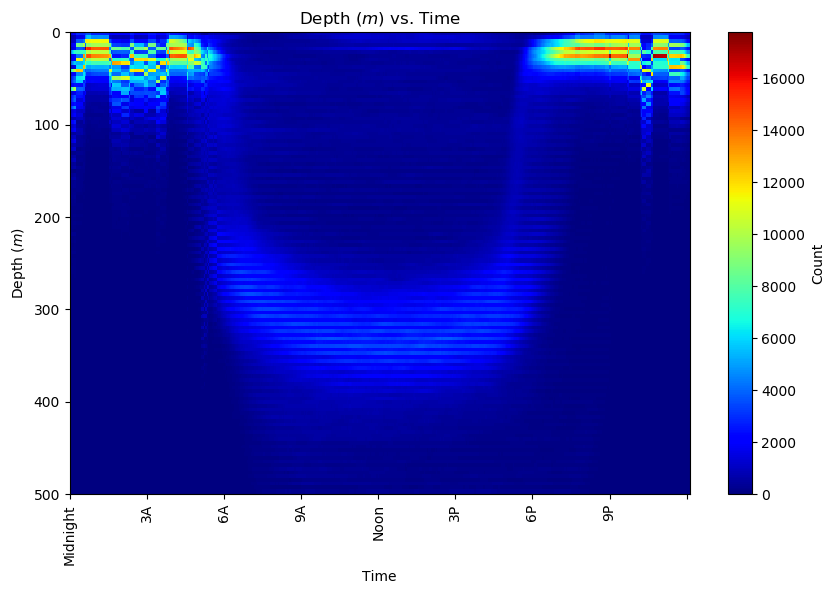

In [25]:
L, H = data['Time'].max(), 500
data_ = data[data['Depth'] <= H]
l = np.linspace(0, L, L//3).astype(int)
h = np.linspace(0, H, H//4).astype(int)
X, Y = np.meshgrid(l, h)
Z = np.sin(X**2 + Y**2)
i = 0
while i < len(l)-1:
    if i % int((.1*len(l))) == 0:
        print(i)
    df = data_[data_['Time'] < l[i+1]+15]
    df = df[l[i]-15 <= df['Time']]
    hist, edges = np.histogram(df['Depth'], bins=len(h))
    Z[:,i] = hist
    i += 1

plt.close()
plt.figure(1, figsize=(10,6))
plt.xlabel('Time')
plt.ylabel('Depth ($m$)')
plt.title('Depth ($m$) vs. Time')
plt.pcolormesh(X, Y, Z, cmap='jet')
cbar1 = plt.colorbar()
cbar1.set_label("Count")

labels = ['Midnight', '3A', '6A', '9A', 'Noon', '3P', '6P', '9P']
ticks = int(data['Time'].max())
TICKS = []
for i in range(ticks):
    if i % int(ticks/8) == 0:
        TICKS.append(i)
plt.xticks(TICKS, labels, rotation=90)
plt.gca().invert_yaxis()
# plt.savefig('pics/Swordfish_heatmap_with_histo.png', bbox_inches = 'tight')
plt.show()


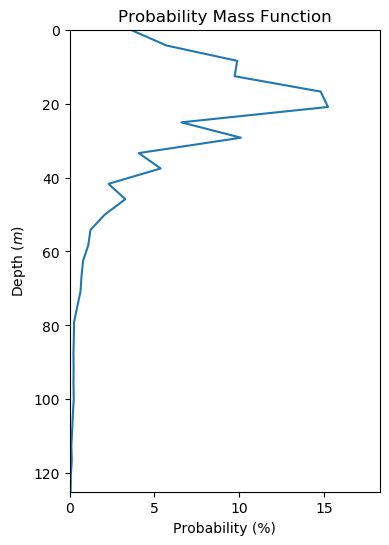

In [69]:
hist, bins = np.histogram(data['Depth'], bins=75)
norm = hist.sum()
hist = hist/norm*100
plt.figure(figsize=(4,6))
plt.plot(hist, bins[:-1])
plt.xlim(0, 1.2*hist.max())
plt.ylim(0, 125)
plt.xlabel('Probability (%)')
plt.ylabel('Depth ($m$)')
plt.title('Probability Mass Function')
plt.gca().invert_yaxis()

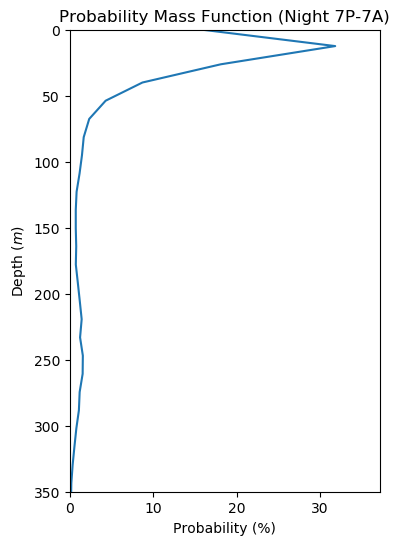

In [95]:
filtered_data = data[data['Time'] <= 60*7]
filtered_data.append(data[data['Time'] >= 60*19])
hist, bins = np.histogram(filtered_data['Depth'], bins=100)
norm = hist.sum()
hist = hist/norm*100
plt.figure(figsize=(4,6))
plt.plot(hist, bins[:-1])
plt.xlim(0, 1.168*hist.max())
plt.ylim(0, 350)
plt.xlabel('Probability (%)')
plt.ylabel('Depth ($m$)')
plt.title('Probability Mass Function (Night 7P-7A)')
plt.gca().invert_yaxis()

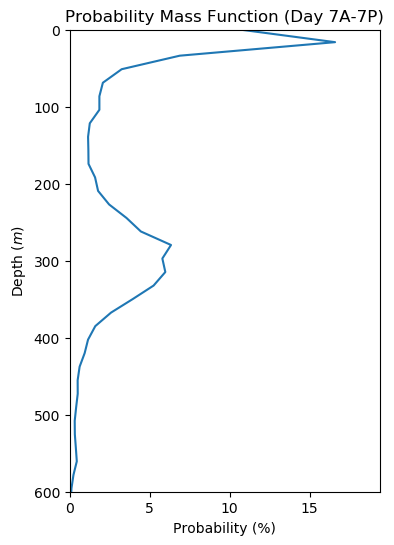

In [98]:
filtered_data = data[data['Time'] <= 60*19]
filtered_data.append(data[data['Time'] >= 60*7])
hist, bins = np.histogram(filtered_data['Depth'], bins=100)
norm = hist.sum()
hist = hist/norm*100
plt.figure(figsize=(4,6))
plt.plot(hist, bins[:-1])
plt.xlim(0, 1.168*hist.max())
plt.ylim(0, 600)
plt.xlabel('Probability (%)')
plt.ylabel('Depth ($m$)')
plt.title('Probability Mass Function (Day 7A-7P)')
plt.gca().invert_yaxis()